<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_5_Pen_Based_Recognition_of_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Phân loại chữ viết tay dựa vào mẫu trong file csv 

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file penbased-5an-nn.csv


**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_csv(path+'data/penbased-5an-nn.csv',header=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10992 non-null  int64
 1   1       10992 non-null  int64
 2   2       10992 non-null  int64
 3   3       10992 non-null  int64
 4   4       10992 non-null  int64
 5   5       10992 non-null  int64
 6   6       10992 non-null  int64
 7   7       10992 non-null  int64
 8   8       10992 non-null  int64
 9   9       10992 non-null  int64
 10  10      10992 non-null  int64
 11  11      10992 non-null  int64
 12  12      10992 non-null  int64
 13  13      10992 non-null  int64
 14  14      10992 non-null  int64
 15  15      10992 non-null  int64
 16  16      10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


**Dựa vào dữ liệu, có thể thấy data từ column 0 đến 15 là attribute của column 16, có giá trị tư 0 đến 100**

**Column 16 là class có giá trị từ 0 đến 9**

**Do không thể xác định được mối liên hệ giữa các columns, bài toán này là bài toán phân loại => sử dụng SVM để xử lý**


In [ ]:
X = data.iloc[:,0:15]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100


In [ ]:
X.shape

(10992, 15)

In [ ]:
y = data.iloc[:,16]
y.head()

0    1
1    9
2    2
3    5
4    7
Name: 16, dtype: int64

In [ ]:
y.shape

(10992,)

In [ ]:
import datetime
x1 = datetime.datetime.now()
print(x1)

2020-11-29 07:56:55.216159


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x1_end=datetime.datetime.now()
print(x1_end)
x1_distance = x1_end - x1

2020-11-29 07:57:00.350872


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.8875075803517283

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

88.75075803517282

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[299   0   0   0   1   0   1   0  35   0]
 [  0 283  10   3   1   0   0   2  22   1]
 [  0  11 301   1   0   0   0   2  30   0]
 [  0   2   1 292   0   1   0   2  35   1]
 [  2   0   0   0 305   0   1   0  34   0]
 [  0   0   0   4   0 304   0   0  47   8]
 [  0   0   0   0   0   0 275   0  29   0]
 [  0   9   4   1   0   0   0 285  44   0]
 [  0   0   0   0   0   0   0   0 305   0]
 [  0   0   0   0   0   0   0   2  24 278]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       336
           1       0.93      0.88      0.90       322
           2       0.95      0.87      0.91       345
           3       0.97      0.87      0.92       334
           4       0.99      0.89      0.94       342
           5       1.00      0.84      0.91       363
           6       0.99      0.90      0.95       304
           7       0.97      0.83      0.90       343
           8       0.50      1.00      0.67       305
           9       0.97     

**Precision của 8 thấp hơn rất nhiều so với các số còn lại**

**Recall của 7 là thấp nhất**

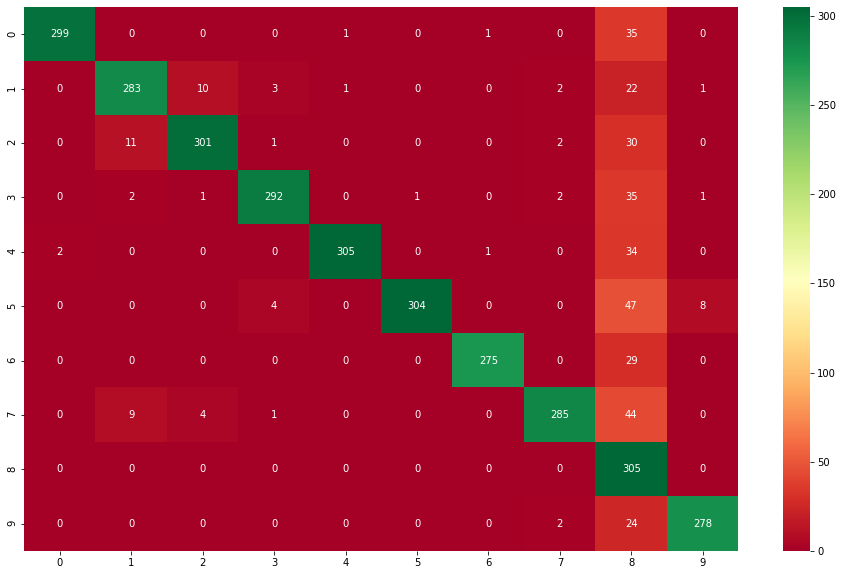

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='RdYlGn',annot=True,fmt='g')

**Dựa vào heatmap ta thấy số lượng các số bị dự đoán nhầm vào 8 là rất cao**

**Yêu cầu 2: Giảm chiều dữ liệu bằng PCA và thực hiện lại thuật toán**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1','principal component 2',
                                                                'principal component 3','principal component 4',
                                                                'principal component 5','principal component 6',
                                                                'principal component 7','principal component 8'])

In [ ]:
finalDf = pd.concat([principalDf,y],axis=1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,16
0,-3.821427,-75.808407,72.356043,16.325790,11.723467,21.052220,-27.944622,13.204135,1
1,62.772605,-76.702973,-33.444965,-19.281978,46.432382,-1.532667,8.310228,-12.905273,9
2,-99.292124,-25.259477,31.704498,-29.841899,-3.501268,10.034916,-30.700588,1.476098,2
3,-67.762664,103.625937,45.449702,45.238361,4.268568,20.330724,-0.891011,11.453669,5
4,-70.691073,18.552960,36.921736,-0.131716,-7.973548,-20.849483,10.697012,-2.910007,7


In [ ]:
pca.explained_variance_ratio_

array([0.25141337, 0.22906668, 0.15698582, 0.08483457, 0.06340157,
       0.05331832, 0.03322941, 0.03040313])

In [ ]:
pca.explained_variance_ratio_.sum()

0.902652876459618

**Giữ lại được 90% thông tin nếu quyết định giảm nửa chiều dữ liệu**

**thực hiện lại model với bộ dữ liệu đã giảm chiều**

In [ ]:
X_pca = finalDf.iloc[:,0:8]

In [ ]:
X_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-3.821427,-75.808407,72.356043,16.325790,11.723467,21.052220,-27.944622,13.204135
1,62.772605,-76.702973,-33.444965,-19.281978,46.432382,-1.532667,8.310228,-12.905273
2,-99.292124,-25.259477,31.704498,-29.841899,-3.501268,10.034916,-30.700588,1.476098
3,-67.762664,103.625937,45.449702,45.238361,4.268568,20.330724,-0.891011,11.453669
4,-70.691073,18.552960,36.921736,-0.131716,-7.973548,-20.849483,10.697012,-2.910007


In [ ]:
y_pca = data.iloc[:,16]
y_pca.head()

0    1
1    9
2    2
3    5
4    7
Name: 16, dtype: int64

In [ ]:
x2 = datetime.datetime.now()
print(x2)

2020-11-29 07:57:04.811874


In [ ]:
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca,y_pca,test_size=0.3)

In [ ]:
from sklearn import svm

In [ ]:
clf_pca = svm.SVC(gamma=0.001, C=100)
clf_pca.fit(X_pca_train,y_pca_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x2_end = datetime.datetime.now()
print(x2_end)
x2_distance = x2_end - x2

2020-11-29 07:57:07.480179


In [ ]:
y_pca_pred = clf_pca.predict(X_pca_test)

In [ ]:
clf_pca.score(X_pca_test,y_pca_test)

0.9241964827167981

In [ ]:
clf_pca.score(X_pca_train,y_pca_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pca_test, y_pca_pred)*100

92.4196482716798

**Kết quả thực hiện tốt, độ chính xác vẫn trên 90%**

**Chênh lệch thời gian thực hiện**

In [ ]:
print('Chưa có PCA:',x1_distance)
print('Có PCA:',x2_distance)

Chưa có PCA: 0:00:05.134713
Có PCA: 0:00:02.668305


**Kết quả có giảm thời gian được khoảng 3 giây, có thể xem xét đến việc thực hiện PCA nếu dữ liệu lớn hơn**